In [ ]:
import __init__

from IPython import display
import cv2
import os
import time
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
# from package.faceapi.torch_face.handler import Detector, Encoder

from package.botsort.fast_reid.fast_reid_interfece import FastReIDInterface

In [1]:
import cv2
import os
import time
import matplotlib.pyplot as plt
from faceapi import FaceAPIManager

In [3]:
face_api_manager = FaceAPIManager(
    detector_model_path='model_weights/face-yolov8-m.pt',
    encoder_model_path='model_weights/model_resnet34_triplet.pt',
)
# reid_encoder = FastReIDInterface(
#     r'..\package\botsort\fast_reid\configs\MOT17\sbs_S50.yml', 
#     r'..\package\botsort\reid_model\mot17_sbs_S50.pth', 
#     face_api_manager._encoder._devie
# )

WARNING ⚠️ imgsz=[262, 410] must be multiple of max stride 32, updating to [288, 416]


4.770965099334717

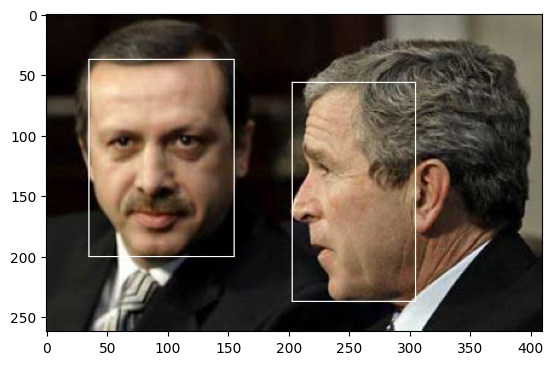

In [4]:
img_file = r'C:/Users/jeffg/face-project/Pytorch_Retinaface/data/FDDB/images/2002/12/10/big/img_410.jpg'
# img_file = r'C:/Users/jeffg/Desktop/test.jpg'
img = cv2.imread(img_file, cv2.IMREAD_COLOR)[..., ::-1]
display_img = img.copy()

plt.imshow(img)

st = time.time()
faces = face_api_manager.handle(img, conf=0.5)
for face in faces:
    x1,y1,x2,y2  = face.xyxy  
    #reid = reid_encoder.inference(img, np.array(face.xyxy)[None]).ravel()
    cv2.rectangle(display_img, ( x1,y1),(x2,y2), (255, 255, 255))
    
#embeddings = face_embedder.handle(face_img_list)
plt.imshow(display_img)

cost = time.time() -st
cost

In [5]:
face

FaceDetection(xyxy=[203, 56, 305, 237], score=0.8390119671821594, landms=[], embedding=array([  -0.029914,   -0.027732,   -0.071116,     0.12024,  -0.0063942,   -0.022852,    0.038491,   -0.015941,    -0.05964,   -0.029587,    0.017067,   0.0087898,    0.011572,   -0.037887,   -0.063067,     0.01909,   -0.033886,     0.03716,    -0.12393,    0.013154,  -0.0090179,     0.05972,   0.0085997,      0.0262,
         -0.021949,    0.049632,  -0.0056757,    0.025209,    0.067529,   -0.031667,   -0.023238,    0.059623,    0.059016,    -0.01879,   0.0064221,    0.015061,    0.070171,   0.0049047,    0.060592,    0.080987,   -0.029461,    0.024108,    0.063418,    0.052703,   -0.021966,  0.00079763,   0.0026455,    0.015388,
         0.0024514,   -0.024923,    0.038384,   -0.045165,   -0.044952,    0.025911,    0.050408,    0.020562,    0.018532,   -0.012841,   0.0078261,     0.02296,   -0.074256,    0.017474,   -0.039805,   -0.054753,    0.019568,   0.0039053,   -0.043394,    -0.05902,    -0.10

In [7]:
import cv2
import os
import time

In [8]:
cap = cv2.VideoCapture(0)
# 獲取視頻的基本屬性
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

f_id = 0
while True:
    ret, frame = cap.read()  # 讀取一幀
    # 如果視頻結束，跳出迴圈
    if not ret:
        break
        
    st = time.time()
    raw_img = frame.copy()
    
    faces = face_api_manager.handle(frame, conf=0.5)
    for face in faces:
        x1,y1,x2,y2  = face.xyxy  
        cv2.rectangle(raw_img, ( x1,y1),(x2,y2), (255, 255, 255))
        
    cost = time.time() - st
    print(f"f_id:{f_id}, cost {cost}", end='\r')
    f_id+=1
    #face_embeddings = vgg_face_model(face_embeddings.to(device))
            

    
    # 顯示視頻畫面
    cv2.imshow('Video2',raw_img)
    
    # 每幀等待1毫秒，並檢查是否按下'q'鍵
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cv2.destroyAllWindows()
cap.release()

# Export model to openvino

In [ ]:
# !pip install onnx==1.12.0
# !pip install -q onnxruntime==1.17.0

In [ ]:
face_api_manager._detector._model.export(format='openvino')

In [ ]:
from ultralytics import YOLO

In [ ]:
ov_model = YOLO('./face-yolov8-m_openvino_model/')

In [ ]:
!pip list

# bar-ai face database save embedding

In [ ]:
from package.utils import checkAndMkdirs
import pickle
import numpy as np
from glob import glob

In [ ]:
# face_db_path = 'C:/Users/jeffg/bar-ai/face-dataset/train/'
face_db_path = 'C:/Users/jeffg/bar-ai/face-dataset/val/'

In [ ]:
for label in [l for l in os.listdir(face_db_path) if not '.pkl' in l]:
    
    face_embedding_list = []
    reid_embedding_list = []
    img_path_list = []
    
    
    for img_file in os.listdir(os.path.join(face_db_path, label)):
        img_path = os.path.join(face_db_path, label, img_file)
        # img_file = r'C:/Users/jeffg/Desktop/test.jpg'
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)[..., ::-1]
        faces = face_api_manager.handle(img, conf=0.6)
        if len(faces)>0:
            reid = reid_encoder.inference(img, np.array([0,0, *img.shape[:2]])[None]).ravel()
            face_embedding = faces[np.argmax([f.score for f in faces])].embedding
            
            face_embedding_list.append(face_embedding)
            reid_embedding_list.append(reid)
            img_path_list.append(img_path)
            

            
    face_embedding_list = np.array(face_embedding_list)
    reid_embedding_list = np.array(reid_embedding_list)
    img_path_list = np.array(img_path_list)
    
    with open(os.path.join(face_db_path, f'{label}.pkl'), 'wb') as writer:
        pickle.dump({
                'face': face_embedding_list,
                'reid': reid_embedding_list,
                'img_path': img_path_list
            }, writer, protocol=pickle.HIGHEST_PROTOCOL)


In [ ]:
img_path = os.path.join(face_db_path, label, img_file)
# img_file = r'C:/Users/jeffg/Desktop/test.jpg'
img = cv2.imread(img_path, cv2.IMREAD_COLOR)[..., ::-1]
display_img = img.copy()
plt.imshow(img)

st = time.time()
faces = face_api_manager.handle(img, conf=0.6)
for face in faces:
    x1,y1,x2,y2  = face.xyxy  
    cv2.rectangle(display_img, ( x1,y1),(x2,y2), (255, 255, 255))
    cv2.putText(display_img, f'%.3f'%(face.score), (x1 + 6, y1 - 6),  cv2.FONT_HERSHEY_DUPLEX, 0.5, (255, 255, 255), 1)
    
# embeddings = face_embedder.handle(face_img_list)
plt.imshow(display_img)
cost = time.time() -st
cost

# 將下來試試分群

train

In [ ]:
def buildEmbeddingData(path):
    all_face_embeddings = None
    all_reid_embeddings = None
    face_label_list = []
    img_file_list = None
    
    
    for pkl_file in glob(os.path.join(path, '*.pkl')):
        with open(pkl_file, 'rb') as reader:
            payload = pickle.load(reader)
            
            face_embeddings = payload['face']
            reids = payload['reid']
            img_paths = payload['img_path']
            label = os.path.basename(pkl_file).replace('.pkl', '')
            
            
        if all_face_embeddings is None:
            all_face_embeddings = face_embeddings
        else:
            all_face_embeddings = np.vstack((all_face_embeddings, face_embeddings))


        if all_reid_embeddings is None:
            all_reid_embeddings = reids
        else:
            all_reid_embeddings = np.vstack((all_reid_embeddings, reids))

            
        if img_file_list is None:
            img_file_list = img_paths
        else:
            img_file_list = np.append(img_file_list, img_paths)
        
        face_label_list += [label for i in range(face_embeddings.shape[0])]
        
    face_label_list = np.array(face_label_list)
    return all_face_embeddings, all_reid_embeddings, face_label_list, img_file_list

In [ ]:
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs  # 仅用于生成示例数据
import plotly.graph_objects as go
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [ ]:
class FaceRecognizer:
    def __init__(self, 
                 base_embeddings : np.ndarray, 
                 labels : np.ndarray, 
                 da_name = 'lda',
                 n_components = 5):
        self._base_embeddings = base_embeddings
        self._labels = labels
        self._unique_label_labels, self._label_counts = np.unique(self._labels, return_counts=True)
        self._label_count_maplist = {
            k:v 
            for k, v in zip(self._unique_label_labels, self._label_counts)
        }
        self._da_name = da_name
        if not self._da_name is None:
            # 降維模型 dimension reduction 
            self._buildLDAModel(self._da_name, n_components)
        else:
            self._base_da_embeddings = self._base_embeddings
            
    def _buildLDAModel(self, da_name="lda", n_components = 5):
        if da_name == 'lda':
            # 使用 LDA 进行降维
            self._da_model = LDA(n_components= n_components)  # 你可以选择降维到的维数
            self._da_model.fit(
                self._base_embeddings, 
                self._labels
            )
        elif da_name == 'pca':
            # 創建PCA模型，指定降維後的維度
            self._da_model = PCA(n_components= n_components)  # 你可以选择降维到的维数
            self._da_model.fit(
                self._base_embeddings, 
            )
        elif da_name == 'tsne':
            self._da_model = TSNE(
                learning_rate=0.1, n_iter=3000,
                n_components=3, 
                perplexity = 50,
            #     init =  'pca'
            #     method='exact'
            )
        else:
            raise ValueError('no da model')
            
        self._base_da_embeddings = self.getDAEmbedding(self._base_embeddings)
        
    def getDAEmbedding(self, embeddings: np.ndarray) -> np.ndarray:
        if self._da_name != 'tsne':
            return self._da_model.transform(embeddings)
        else:
            return self._da_model.fit_transform(embeddings)

    @property
    def base_da_embeddings(self) -> np.ndarray:
        return self._base_da_embeddings
    
    @property
    def base_embeddings(self) -> np.ndarray:
        return self._base_embeddings
    
    @property
    def labels(self) -> np.ndarray:
        return self._labels
    
    
    def predictEmbedding(self, da_embedding: np.ndarray, threshold=0.5)  -> np.ndarray:
        sim_score = cosine_similarity(self.base_da_embeddings, [da_embedding])
        pred_label_labels, pred_label_counts = np.unique(self.labels[sim_score.ravel() > threshold], return_counts=True)
        pred_label_count_maplist = {
            k:v 
            for k, v in zip(pred_label_labels, pred_label_counts)
        }

        pred_prob = {}
        for base_label, base_label_counnt in self._label_count_maplist.items():
            predict_cournt = pred_label_count_maplist.get(base_label)
            if predict_cournt is None:
                pred_prob[base_label] = 0
            else:
                pred_prob[base_label] = predict_cournt/base_label_counnt

        return pred_prob
        
    def predictEmbeddingLabel(self, da_embedding: np.ndarray, threshold=0.5)  -> np.ndarray:
        pred_prob = self.predictEmbedding(da_embedding, threshold)
        max_prob = 0
        max_label = None
        for label, prob in pred_prob.items():
            if prob > max_prob:
                max_prob = prob
                max_label = label
                
        if max_prob < 0.5:
            return None
        else:
            return max_label
        

In [ ]:
train_all_face_embeddings, \
train_all_reid_embeddings, \
train_face_label_list, \
train_img_file_list =  buildEmbeddingData('C:/Users/jeffg/bar-ai/face-dataset/train')
unique_label_labels, label_counts = np.unique(train_face_label_list, return_counts=True)


test_all_face_embeddings, \
test_all_reid_embeddings, \
test_face_label_list, \
test_img_file_list =  buildEmbeddingData('C:/Users/jeffg/bar-ai/face-dataset/val')

In [ ]:
face_recognizer = FaceRecognizer(
    train_all_face_embeddings,
    train_face_label_list,
    n_components= 10,
    da_name='tsne'
)

In [ ]:

# 創建數據

x = face_recognizer.base_da_embeddings[:, 0]
y = face_recognizer.base_da_embeddings[:, 1]
z = face_recognizer.base_da_embeddings[:, 2]
labels = face_recognizer.labels

# 創建字典以映射標籤到隨機顏色
label_colors = {label: np.random.rand(3,) for label in set(labels)}


# 創建3D散點圖
fig = go.Figure(data=[go.Scatter3d(
    x=x, 
    y=y, 
    z=z, 
    text=labels, 
    mode='markers', 
#     marker=dict(size=5, color=labels, colorscale='Viridis'),
    marker=dict(size=5, color=[label_colors[label] for label in labels]),
    showlegend=False  ,  # 顯示圖例
#     name='Labels'  # 圖例名稱
    )]
)

fig.update_layout(width=1000, height=1000)
# 添加互動功能
fig.update_layout(scene=dict(aspectmode='cube'))
fig.update_layout(title='Interactive 3D Scatter Plot', scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'))


# 設定圖例
# for label, color in label_colors.items():
#     fig.add_trace(go.Scatter3d(x=[], y=[], z=[], mode='markers', marker=dict(color=f'rgb({color[0] * 255},{color[1] * 255},{color[2] * 255})'), name=str(label)))


fig.show()

In [ ]:
# !pip install plotly --upgrade
# !pip install -U kaleido

# test

In [ ]:
test_da_embeddings = face_recognizer.getDAEmbedding(test_all_face_embeddings)
# test_da_embeddings = test_all_face_embeddings

In [ ]:
pred_label_list = [face_recognizer.predictEmbeddingLabel(test_da_embedding, threshold=0.7) for test_da_embedding in test_da_embeddings]

In [ ]:
pred_label_list = np.array(pred_label_list)

In [ ]:
(test_face_label_list == pred_label_list).mean()

# Grid search

In [ ]:
params_list = []
for da_name in ['lda', 'pca', ]:
    for n in range(3, unique_label_labels.shape[0]):
        face_recognizer = FaceRecognizer(
            train_all_face_embeddings,
            train_face_label_list,
            n_components= n,
            da=da_name
        )
        test_da_embeddings = face_recognizer.getDAEmbedding(test_all_face_embeddings)
        # test_da_embeddings = test_all_face_embeddings
        for prob_threshold in np.arange(0.3, 0.9, 0.1):
            pred_label_list = [face_recognizer.predictEmbeddingLabel(test_da_embedding, threshold=0.7) for test_da_embedding in test_da_embeddings]
            pred_label_list = np.array(pred_label_list)
            acc = (test_face_label_list == pred_label_list).mean()

            params_list.append({
                'da_name': da_name,
                "n": n,
                'prob_threshold': prob_threshold,
                'acc': acc
            })

            print(f"da_name: {da_name}, n :{n}, prob_threshold: {prob_threshold}, acc: {acc}")

In [ ]:
# !pip install xgboost

In [ ]:
# 将标签转换为数值
le = LabelEncoder()
numeric_labels = le.fit_transform(train_face_label_list)

In [ ]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
# create model instance
bst = xgb.XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
# fit model
bst.fit(train_all_face_embeddings, numeric_labels)

In [ ]:
clf = RandomForestClassifier(random_state=42)
clf.fit(train_all_face_embeddings, numeric_labels)

In [ ]:
svm = SVC(gamma='auto', probability=True)
svm.fit(train_all_face_embeddings, numeric_labels)

In [ ]:
params_list = []
for prob_threshold in np.arange(0.15, 0.9, 0.1):
    pred_label_list = []
    for t_embedding in test_all_face_embeddings:
        predicted_prob = clf.predict_proba([t_embedding])
        max_prob = np.max(predicted_prob[0])
        if max_prob > prob_threshold:
            predicted_label = np.argmax(predicted_prob)
            pred_l = le.inverse_transform([predicted_label])[0]
        else:
            pred_l = None
        pred_label_list.append(pred_l)
    pred_label_list = np.array(pred_label_list)
    acc = (test_face_label_list == pred_label_list).mean()
    params_list.append({
      'acc': acc,
        'prob_threshold': prob_threshold,
    })
    print(prob_threshold, acc)

In [ ]:
for test_da_embedding, test_label in zip(test_da_embeddings, test_face_label_list):
    pred_label = face_recognizer.predictEmbeddingLabel(test_da_embedding, threshold=0.6)
    if test_label != pred_label:
        raise ValueError

In [ ]:
face_recognizer.predictEmbedding(test_da_embedding, threshold=0.6) 

In [ ]:
test_label, pred_label

In [ ]:
        pred_prob = self.predictEmbedding(da_embedding, threshold)
        max_prob = 0
        max_label = None
        for label, prob in pred_prob.items():
            if prob > max_prob:
                max_prob = prob
                max_label = label
                
        if max_prob < 0.5:
            return None
        else:
            return max_label

In [ ]:
test_idx = 312
test_da_embedding = test_da_embeddings[test_idx]
pred_label = face_recognizer.predictEmbeddingLabel(test_da_embedding)

In [ ]:
pred_label

In [ ]:
test_face_label_list[test_idx]

In [ ]:
face_recognizer.predictEmbedding(test_da_embedding)

In [ ]:
sim_score = cosine_similarity(face_recognizer.base_da_embeddings, [test_da_embedding])

In [ ]:
train_face_label_list[sim_score.ravel() > 0.5]

In [ ]:

sim_score = cosine_similarity(face_recognizer.base_da_embeddings, [test_da_embedding])
# sim_score = cosine_similarity(embedding_pca, [unknow_face_embedding_pca[1]])
pred_label_labels, pred_label_counts = np.unique(train_face_label_list[sim_score.ravel() > 0.5], return_counts=True)
pred_label_labels, pred_label_counts

In [ ]:
pred_label_count_maplist = {
    k:v 
    for k, v in zip(pred_label_labels, pred_label_counts)
}

pred_prob = {}
for k, v in face_recognizer._label_count_maplist.items():
    predict_cournt = pred_label_count_maplist.get(k)
    if predict_cournt is None:
        pred_prob[k] = 0
    else:
        pred_prob[k] = predict_cournt/v

pred_prob

In [ ]:
pred_label_count_maplist

In [ ]:
test_face_label_list[0]

In [ ]:
self._label_count_maplist

沒看過的臉

In [ ]:
img_file = r'C:/Users/jeffg/face-project/Pytorch_Retinaface/data/FDDB/images/2002/12/10/big/img_410.jpg'
# img_file = r'C:/Users/jeffg/Desktop/test.jpg'
img = cv2.imread(img_file, cv2.IMREAD_COLOR)[..., ::-1]
display_img = img.copy()

plt.imshow(img)

st = time.time()
faces = face_api_manager.handle(img, conf=0.5)
for face in faces:
    x1,y1,x2,y2  = face.xyxy  
    cv2.rectangle(display_img, ( x1,y1),(x2,y2), (255, 255, 255))
    
# embeddings = face_embedder.handle(face_img_list)
plt.imshow(display_img)

cost = time.time() -st
cost

In [ ]:
unknow_faces = [f.embedding for f in faces]

In [ ]:
unknow_face_embedding_pca = lda.transform(unknow_faces)

In [ ]:
unknow_face_embedding_pca

In [ ]:
unique_label_labels, label_counts

In [ ]:
sim_score = cosine_similarity(embedding_pca, [unknow_face_embedding_pca[1]])
pred_label_labels, pred_label_counts = np.unique(train_face_label_list[sim_score.ravel() > 0.5], return_counts=True)

In [ ]:
pred_label_labels, pred_label_counts

In [ ]:
unique_label_labels, label_counts 

In [ ]:
plt.bar(x=range(sim_score.shape[0]), height=sim_score.reshape((1, -1))[0])

In [ ]:


# 使用 K-means 进行聚类
n_clusters = 3  # 选择你想要的聚类数量
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(lda_features)

# 输出每个样本的聚类标签
print(clusters)



In [ ]:
clusters

In [ ]:
import plotly.express as px
import pandas as pd
from sklearn.datasets import make_blobs  # 仅用于生成示例数据


# 将 features, clusters 和真实的类标签 y 组合到一个 DataFrame 中
df = pd.DataFrame(features, columns=['Feature1', 'Feature2', 'Feature3'])
df['Cluster'] = clusters  # 假设 clusters 是你前面得到的聚类结果
df['True Label'] = y

# 使用 plotly.express 创建一个 3D 散点图
fig = px.scatter_3d(df, x='Feature1', y='Feature2', z='Feature3', color='Cluster', text='True Label',
                     color_continuous_scale=px.colors.qualitative.Plotly)

# 更新 hover 模板，以便在鼠标悬停时显示真实的类标签
fig.update_traces(hoverinfo='text')

# 显示图形
fig.show()
